In [354]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Datasets Overview

In [355]:
allEnergy = pd.read_excel('Production of electricity.xlsx')
gas = pd.read_excel('Natural gas production volume (stat kg).xlsx')
coal = pd.read_excel('Volume of coal and lignite production (stat kg).xlsx')
energyUse = pd.read_excel('Energy use in Kyrgyz Republic(WBOD).xlsx')

print(allEnergy)
print(gas.head())
print(coal.head())
print(energyUse.head())

    Көрсөткүчтөрдүн аталыштары    Наименование показателей  \
0    Өндүрүлгөн электроэнергия  Произведено электроэнергии   
1      Гидро электростанциялар         Гидроэлектростанции   
2  Жылуулук электростанциялар      Тепловые электростанции   

                             Items   1992   1993   1994   1995   1996   1997  \
0  The electric power are produced  11980  11273  12932  12349  13758  12637   
1     Hydroelectric power stations   9288   9085  11724  11118  12255  10934   
2    Thermoelectric power stations   2692   2188   1208   1231   1503   1703   

    1998  ...     2015     2016    2017    2018    2019    2020    2021  \
0  11618  ...  11697.6  10540.7  9383.8  8226.9  7070.0  5913.1  4756.2   
1   9943  ...  10932.1   9849.8  8767.5  7685.2  6602.9  5520.6  4438.3   
2   1675  ...    765.5    690.9   616.3   541.7   467.1   392.5   317.9   

     2022    2023    2024  
0  3599.3  2442.4  1285.5  
1  3356.0  2273.7  1191.4  
2   243.3   168.7    94.1  

[3 rows x 36 col

Cleaning dataset 'Production of electricity' 
measures are in million kilowatt-hours

In [356]:
allEnergy = allEnergy.drop(columns=['Көрсөткүчтөрдүн аталыштары', 'Наименование показателей', 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005])
allEnergy = allEnergy.rename(columns={'Items': 'Year'})
allEnergy_T = allEnergy.T

print(allEnergy_T.head())

                                    0                               1  \
Year  The electric power are produced    Hydroelectric power stations   
2006                          14523.2                         13652.5   
2007                          14830.4                         14004.1   
2008                          11789.1                         10759.1   
2009                          11083.2                         10098.0   

                                   2  
Year   Thermoelectric power stations  
2006                           870.7  
2007                           826.3  
2008                          1030.0  
2009                           985.2  


Cleaning dataset "Natural gas production"
measures are in million m3

In [357]:
gas = gas.dropna()

#delete columns in russian and kyrgyz language
gas = gas.drop(columns=['Көрсөткүчтөрдүн аталыштары', 'Наименование показателей'])
gas = gas.rename(columns={'Items': 'Year'})
gas_T = gas.T

print(gas_T.head())

                    0                  1
Year  Kyrgyz Republic  Jalal-Abat oblast
2006             19.4               19.4
2007               15                 15
2008             17.4               17.4
2009             15.4               15.4


Cleaning dataset 'Volume of coal and lignite production'
measures are in thousand tons

In [358]:
coal = coal.dropna()

#delete columns in russian and kyrgyz language
coal = coal.drop(columns=['Көрсөткүчтөрдүн аталыштары', 'Наименование показателей'])
coal = coal.rename(columns={'Items': 'Year'})
coal = coal.replace('-', 0)
coal_T = coal.T

print(coal.head())

                Year   2006   2007   2008   2009   2010   2011    2012  \
0    Kyrgyz Republic  321.3  395.6  491.8  606.9  575.0  830.7  1163.9   
1      Batken oblast  139.4  132.6  157.1  148.9  156.5  179.0   190.4   
2         Osh oblast   31.3   89.9  135.0  185.4  181.4  253.5   491.8   
4  Jalal-Abat oblast   23.3   26.5   46.5   51.1   49.5   53.4    88.5   
5   Yssyk-Kul oblast   22.2   10.7    8.6    8.9    4.2    9.1    13.1   

     2013    2014    2015    2016    2017    2018       2019    2020    2021  \
0  1406.8  1812.0  1928.7  1851.3  1870.4  2395.2  2605.9942  2677.7  3062.5   
1   213.8   203.6   249.0   294.0   222.1   378.7   422.5538   475.6   654.9   
2   625.5   698.1   763.2   585.7   650.3   773.2   810.8041   535.2   875.1   
4   153.5   231.0   159.8   146.9   130.4   155.6   120.4374   300.9   264.5   
5     0.9     1.0     3.4     3.8     0.0     0.0     0.0000     0.0     0.0   

     2022    2023  2024 1  
0  3775.4  4177.4  4396.3  
1   774.9   954.4 

C:\Users\User\AppData\Local\Temp\ipykernel_6228\1612701385.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  coal = coal.replace('-', 0)


Cleaning dataset 'Energy use'

In [359]:
energyUse = energyUse.drop(columns=['Indicator Code', 'Country Code'])
energyUse_kg = energyUse[energyUse['Country Name']=='Kyrgyz Republic']
energyUse.fillna(energyUse.mean(numeric_only=True), inplace=True)
energyUse = energyUse.round(1)

print(energyUse_kg.head())

        Country Name                                Indicator Name  \
122  Kyrgyz Republic  Energy use (kg of oil equivalent per capita)   

           2006       2007        2008        2009        2010        2011  \
122  485.424849  560.62126  593.947818  535.174331  503.615577  596.801844   

           2012        2013        2014        2015        2016        2017  \
122  731.356416  674.452374  691.538602  659.127758  624.353531  609.705647   

           2018        2019        2020        2021        2022  2023  
122  707.081246  609.881987  562.289194  595.833222  645.014292   NaN  


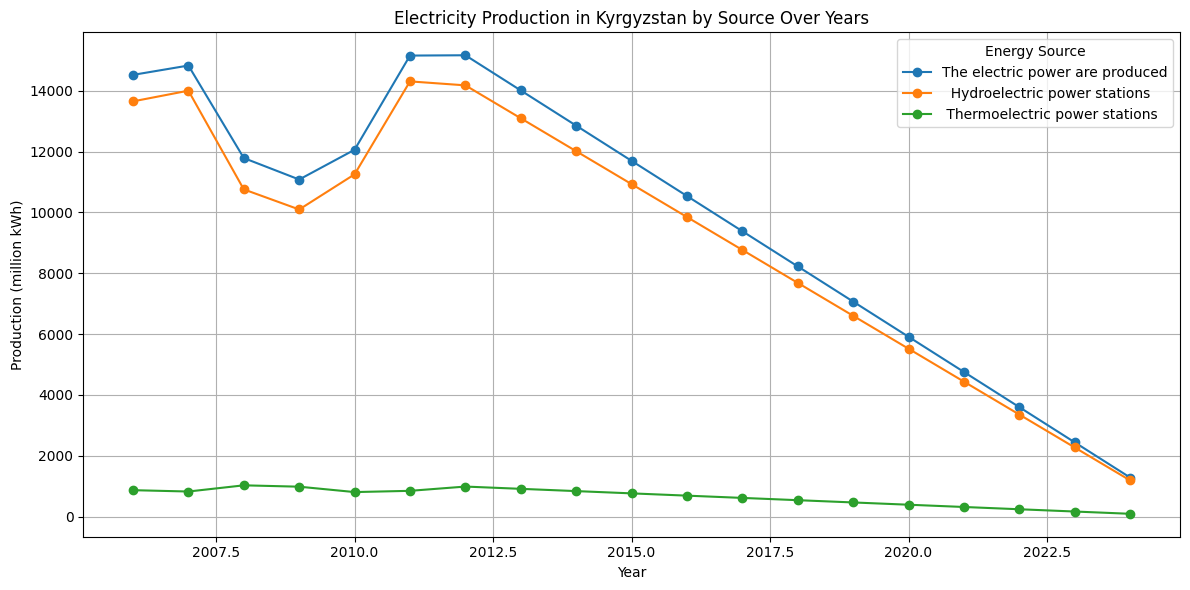

In [360]:
allEnergy = allEnergy.set_index('Year').T
allEnergy.index.name = 'Year'
allEnergy.index = allEnergy.index.astype(int)

plt.figure(figsize=(12, 6))
for column in allEnergy.columns:
    plt.plot(allEnergy.index, allEnergy[column], marker='o', label=column)

plt.title('Electricity Production in Kyrgyzstan by Source Over Years')
plt.xlabel('Year')
plt.ylabel('Production (million kWh)')
plt.legend(title='Energy Source')
plt.grid(True)
plt.tight_layout()
plt.show()

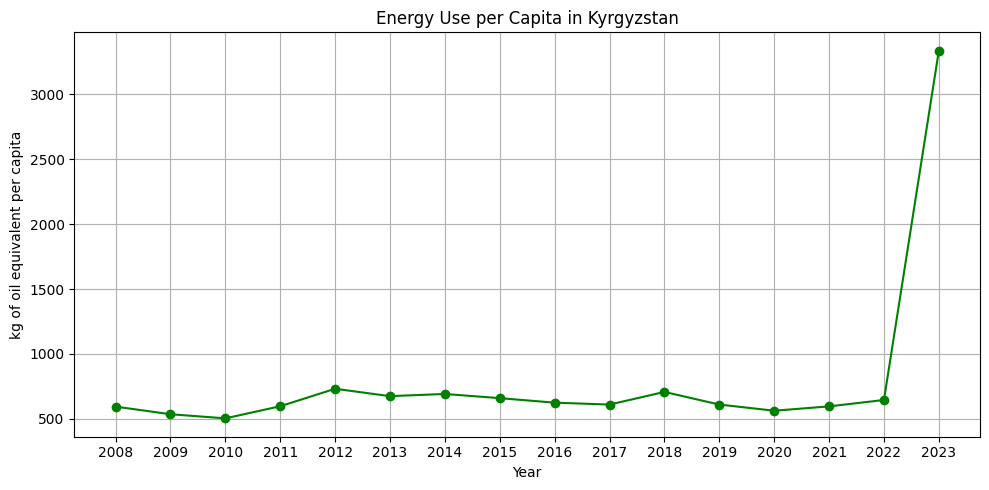

In [361]:
plt.figure(figsize=(10, 5))
years = energyUse_kg.columns[4:]
values = energyUse.loc[energyUse['Country Name'] == 'Kyrgyz Republic', years].values.flatten()

plt.plot(years, values, marker='o', color='green')
plt.title('Energy Use per Capita in Kyrgyzstan')
plt.xlabel('Year')
plt.ylabel('kg of oil equivalent per capita')
plt.grid(True)
plt.tight_layout()
plt.show()


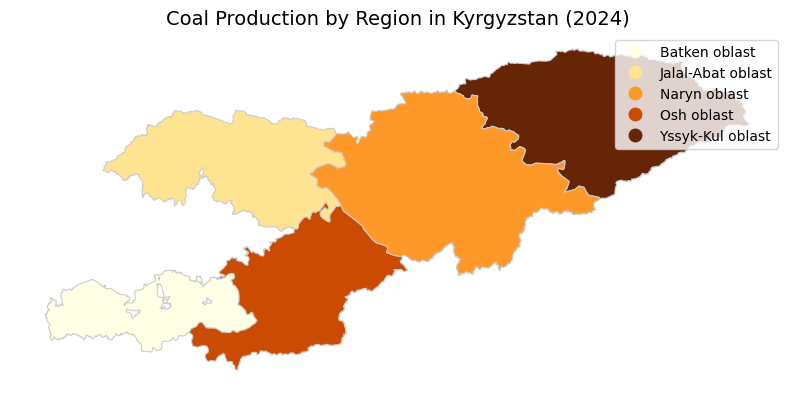

In [362]:
import matplotlib.pyplot as plt
import geopandas as gpd

newCoal = coal.drop(columns=[2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])
newCoal = newCoal.drop(index=[0])
newCoal = newCoal.rename(columns={'Year': 'Region'})

map_df = gpd.read_file('geoBoundaries-KGZ-ADM1.geojson')
map_df = map_df.rename(columns={'shapeName':'Region'})
map_df['Region'] = map_df['Region'].replace('Chuy Region', 'Chuy oblast')
map_df['Region'] = map_df['Region'].replace('Batken Region', 'Batken oblast')
map_df['Region'] = map_df['Region'].replace('Osh Region', 'Osh oblast')
map_df['Region'] = map_df['Region'].replace('Jalal-Abad Region', 'Jalal-Abat oblast')
map_df['Region'] = map_df['Region'].replace('Naryn Region', 'Naryn oblast')
map_df['Region'] = map_df['Region'].replace('Issyk-Kul Region', 'Yssyk-Kul oblast')
map_df['Region'] = map_df['Region'].replace('Talas Region', 'Talas oblast')

merged = map_df.merge(newCoal, on='Region')

# Рисуем карту
fig, ax = plt.subplots(figsize=(10, 6))
merged.plot(column='Region', cmap='YlOrBr', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

ax.set_title('Coal Production by Region in Kyrgyzstan (2024)', fontsize=14)
ax.axis('off')
plt.show()


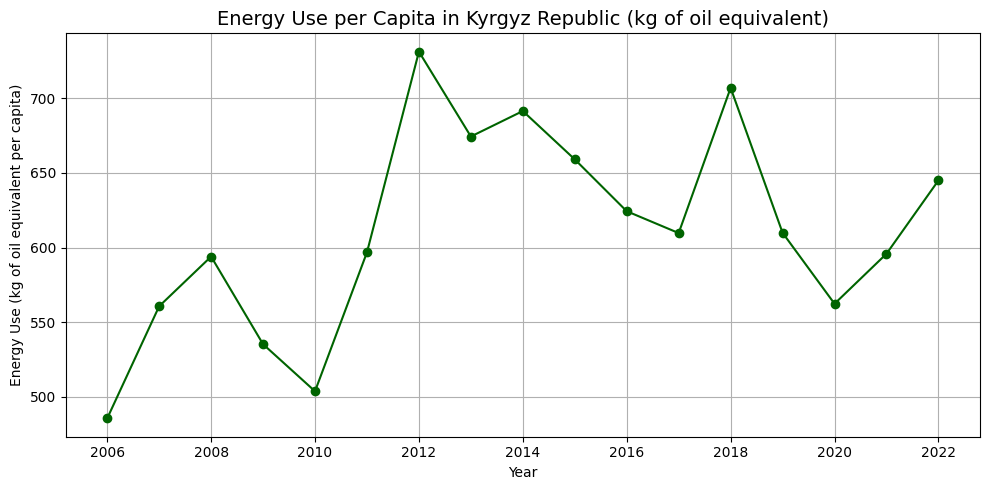

In [363]:
energyUse_clean = energyUse_kg.drop(columns=['Country Name', 'Indicator Name'])

# Транспонируем данные: чтобы годы были по оси X
energyUse_transposed = energyUse_clean.T
energyUse_transposed.columns = ['Energy use (kg of oil equivalent per capita)']
energyUse_transposed.index = energyUse_transposed.index.astype(int)

# Построим график
plt.figure(figsize=(10, 5))
plt.plot(energyUse_transposed.index, energyUse_transposed['Energy use (kg of oil equivalent per capita)'], marker='o', color='darkgreen')
plt.title('Energy Use per Capita in Kyrgyz Republic (kg of oil equivalent)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Energy Use (kg of oil equivalent per capita)')
plt.grid(True)
plt.tight_layout()
plt.show()

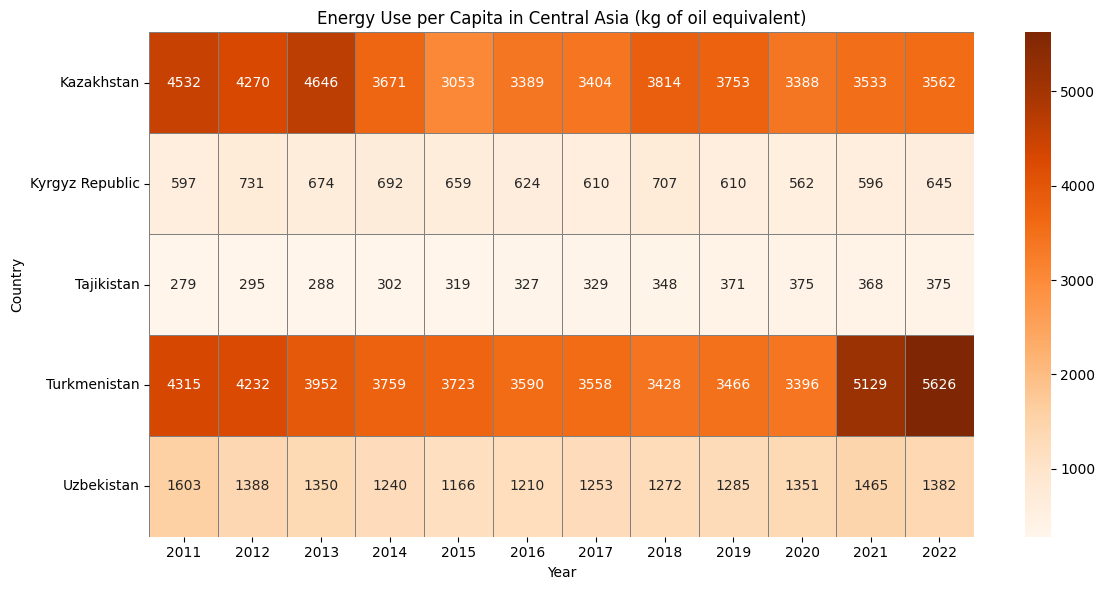

In [364]:
years = [str(year) for year in range(2011, 2023)]
central_asia = ['Kyrgyz Republic', 'Kazakhstan', 'Uzbekistan', 'Tajikistan', 'Turkmenistan']

# Отбираем нужные строки и столбцы
energyUse_ca = energyUse[energyUse['Country Name'].isin(central_asia)]
energyUse_ca = energyUse_ca[['Country Name'] + years]

# Обработка: числовые значения и индекс
energyUse_ca.set_index('Country Name', inplace=True)
energyUse_ca = energyUse_ca.apply(pd.to_numeric, errors='coerce')

# Построение тепловой карты
plt.figure(figsize=(12, 6))
sns.heatmap(energyUse_ca, cmap='Oranges', annot=True, fmt='.0f', linewidths=0.5, linecolor='gray')
plt.title('Energy Use per Capita in Central Asia (kg of oil equivalent)')
plt.xlabel('Year')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

X-axis — years (2011–2024),

Y-axis — countries,

Color — energy consumption intensity (the darker, the higher).

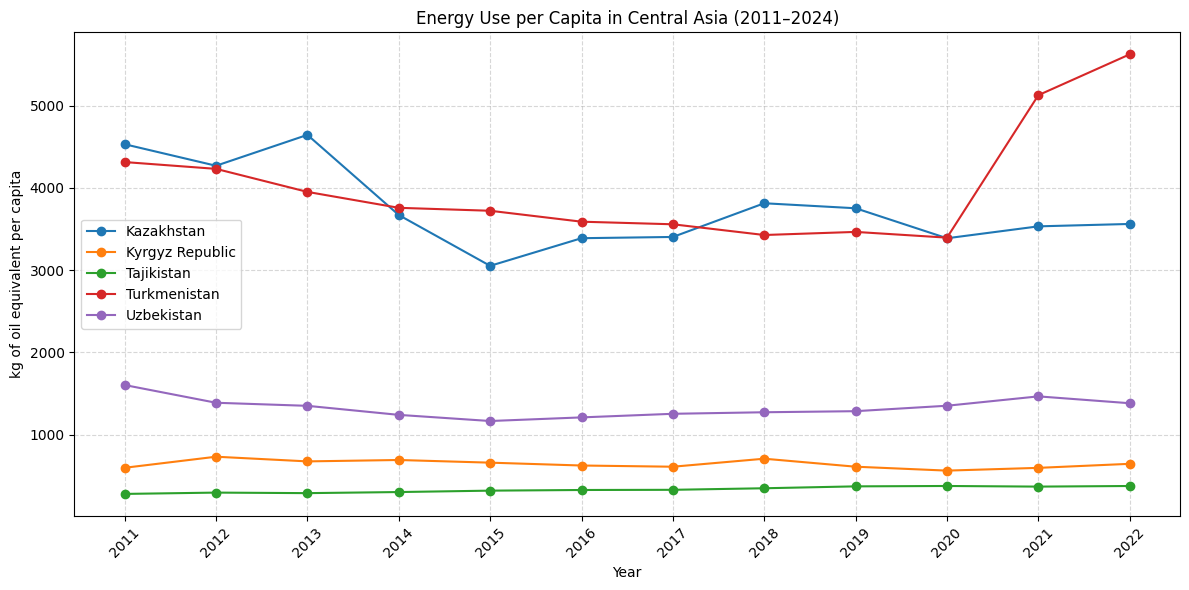

In [365]:
central_asia = ['Kyrgyz Republic', 'Kazakhstan', 'Uzbekistan', 'Tajikistan', 'Turkmenistan']
years = [str(year) for year in range(2011, 2023)]

energyUse_ca = energyUse[energyUse['Country Name'].isin(central_asia)]
energyUse_ca = energyUse_ca[['Country Name'] + years]
energyUse_ca.set_index('Country Name', inplace=True)
energyUse_ca = energyUse_ca.apply(pd.to_numeric, errors='coerce')

# Построение графика
plt.figure(figsize=(12, 6))

for country in energyUse_ca.index:
    plt.plot(years, energyUse_ca.loc[country], marker='o', label=country)

plt.title('Energy Use per Capita in Central Asia (2011–2024)')
plt.xlabel('Year')
plt.ylabel('kg of oil equivalent per capita')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

What the graph shows:
How energy consumption per capita is developing in each country,

Comparison: whose level is higher or lower,

You can trace the growth or decline trends by year.